In [82]:
import tensorflow as tf
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from PIL import Image
import numpy as np
import random

In [83]:
train_data = pd.read_csv('../resources/digit-recognizer/train.csv')
test_data = pd.read_csv('../resources/digit-recognizer/test.csv')


In [84]:
train_data.label.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [85]:
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(columns='label')/ 255.0, train_data[['label']], test_size=0.10, random_state=99)

In [86]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((37800, 784), (4200, 784), (37800, 1), (4200, 1))

In [87]:
agg_data = []
y_agg_data = []
for index in range(len(x_train)):
    image = Image.fromarray(x_train.iloc[index].to_numpy().reshape(28,28))
    rotated_image = image.rotate(random.randint(-45,45))
    rotated_pixel_data = np.array(rotated_image).reshape((784,))
    agg_data.append(rotated_pixel_data)
    y_agg_data.append(y_train.iloc[index])

In [88]:
agg_data = pd.DataFrame(agg_data, columns=x_train.columns)
y_agg_data = pd.DataFrame(y_agg_data, columns=y_train.columns)

In [89]:
x_train = pd.concat([x_train,agg_data]).reset_index(drop=True)
y_train = pd.concat([y_train,y_agg_data]).reset_index(drop=True)

In [90]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((75600, 784), (4200, 784), (75600, 1), (4200, 1))

In [91]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(train_data[['label']])

OneHotEncoder(sparse_output=False)

In [92]:
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [93]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)

In [94]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((75600, 28, 28, 1), (4200, 28, 28, 1), (75600, 10), (4200, 10))

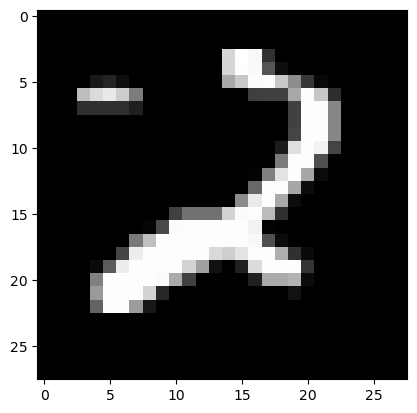

In [102]:
from matplotlib import pyplot as plt

plt.imshow(x_train[3], cmap='gray')
plt.show()

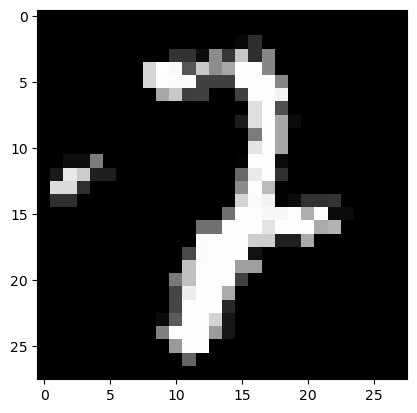

In [103]:
plt.imshow(x_train[3+37800], cmap='gray')
plt.show()